In [1]:
import numpy as np 
import tensorflow as tf
import matplotlib.pyplot as plt
from  tensorflow.keras.models  import  Sequential 
from  tensorflow.keras.layers  import  Dense,  Activation,  Dropout,  Flatten, Conv2D,  MaxPool2D, LayerNormalization , BatchNormalization
from  tensorflow.keras.optimizers  import  Adam
from  tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [2]:
#CHARGEMENT DES DONNEES D'APPRENTISSAGE, ON UTILISE LA VALIDATION POUR APPRENDRE
label = np.load( "label_fair_face.npz" )
Y_val = label[ 'yval' ]
X_val = np.load( 'xval.npy' )
Y_val = tf.keras.utils.to_categorical(Y_val)


In [3]:
#DEFINITION MODELE
input_shape = (224, 224, 3) 

model = Sequential( name = 'model' )


model.add ( Conv2D (16, (3, 3),  padding = 'same', activation = 'relu', input_shape = input_shape)) 
model.add(BatchNormalization())
model.add ( MaxPool2D (pool_size = (3, 3)))
model.add(Dropout(0.25))

model.add ( Conv2D (32, (3, 3),  padding = 'same', activation = 'relu', input_shape = input_shape)) 
model.add(BatchNormalization())
model.add ( MaxPool2D (pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add ( Conv2D (32, (3, 3),  padding = 'same', activation = 'relu', input_shape = input_shape)) 
model.add(BatchNormalization())
model.add ( MaxPool2D (pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add (Flatten()) 
model.add (Dense (128 , activation = 'relu' )) 
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add ( Dense (9 ,  activation= 'softmax' ,  name = 'output' ))   # Il y a 9 classes 


model.summary ()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 16)      448       
_________________________________________________________________
batch_normalization (BatchNo (None, 224, 224, 16)      64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 74, 74, 32)        4640      
_________________________________________________________________
batch_normalization_1 (Batch (None, 74, 74, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 32)        0     

Epoch 1/250
548/548 [==============================] - 116s 211ms/step - loss: 2.7546 - accuracy: 0.1646 - val_loss: 2.9855 - val_accuracy: 0.1597
Epoch 2/250
548/548 [==============================] - 13s 24ms/step - loss: 2.3120 - accuracy: 0.2299 - val_loss: 3.6574 - val_accuracy: 0.2131
Epoch 3/250
548/548 [==============================] - 8s 15ms/step - loss: 2.1466 - accuracy: 0.2674 - val_loss: 4.9492 - val_accuracy: 0.2026
Epoch 4/250
548/548 [==============================] - 8s 14ms/step - loss: 2.0082 - accuracy: 0.2952 - val_loss: 4.1536 - val_accuracy: 0.2086
Epoch 5/250
548/548 [==============================] - 7s 12ms/step - loss: 1.9429 - accuracy: 0.3101 - val_loss: 4.0798 - val_accuracy: 0.2478
Epoch 6/250
548/548 [==============================] - 7s 14ms/step - loss: 1.8288 - accuracy: 0.3425 - val_loss: 3.2882 - val_accuracy: 0.2716
Epoch 7/250
548/548 [==============================] - 8s 15ms/step - loss: 1.7732 - accuracy: 0.3528 - val_loss: 3.1304 - val_accur

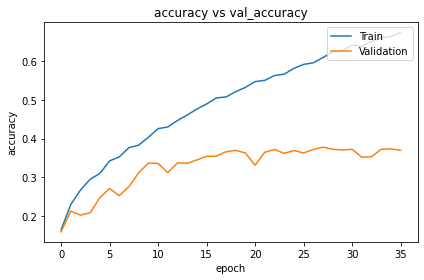

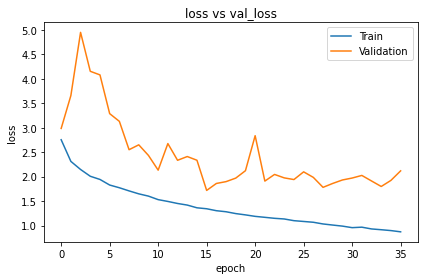

In [4]:
#APPRENTISSAGE

load_model = False

if (load_model == True):
    model = tf.keras.models.load_model('saved_model/model_utk')
else:
    batch_size = 16
    epochs = 250
    model.compile(loss = 'categorical_crossentropy', optimizer = Adam(lr=1e-4),  metrics=['accuracy']) 
    
    callbacks_list = [EarlyStopping(monitor='val_loss', patience=20, verbose = 1)]
    
    history = model.fit(X_val, Y_val, epochs = epochs, batch_size = batch_size,validation_split = 0.2, callbacks=callbacks_list)
    
    tf.keras.models.save_model(model, 'saved_model/model_utk', overwrite=True, include_optimizer=True)
    
    plt.figure()
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('accuracy vs val_accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['Train', 'Validation'], loc='upper right')
    plt.tight_layout()
    plt.show()

    plt.figure()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('loss vs val_loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['Train', 'Validation'], loc='upper right')
    plt.tight_layout()
    plt.show()
